# K-Means Clustering from Scratch
This notebook implements the K-Means clustering algorithm from scratch. K-Means is an unsupervised learning algorithm used for grouping data points into clusters based on similarity. The algorithm iteratively updates cluster centroids to minimize intra-cluster variance.

---

## Importing Required Libraries
We start by importing the necessary libraries: NumPy for mathematical operations, Pandas for data handling, and Matplotlib for visualization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading and Exploring the Dataset
We load the dataset, which consists of two features, and explore its structure by printing the shape.

In [ ]:
data = pd.read_csv('data.csv').to_numpy()
data

array([[516.01270584, 393.01451385,   0.        ],
       [436.21176221, 408.65658486,   0.        ],
       [512.05260123, 372.02201357,   0.        ],
       ...,
       [611.9646116 , 377.25497791,   0.        ],
       [520.65416773, 455.99645316,   0.        ],
       [594.47931419, 392.90145471,   0.        ]])

In [ ]:
data = data[:,0:2]
data.shape

(336, 2)

## Visualizing the Dataset
Before clustering, we visualize the dataset using a scatter plot to understand its distribution.

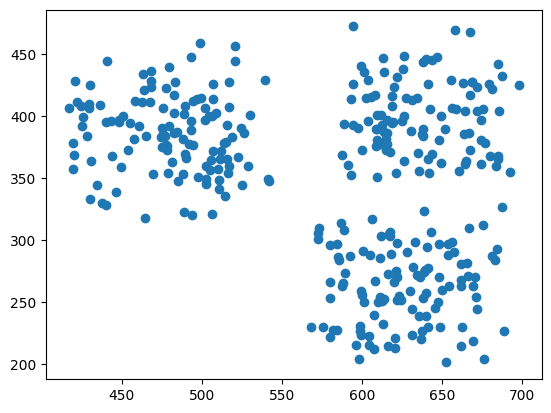

In [ ]:
plt.scatter(data[:,0],data[:,1])

## Implementing K-Means Clustering
We define the `k_meansClustering` class, which includes:
- Initializing cluster centroids
- Assigning data points to the nearest cluster
- Updating centroids iteratively
- Checking for convergence

The algorithm stops when centroids do not change or when the maximum number of iterations is reached.

In [ ]:
class k_meansClustering:
  def __init__(self,max_iter=100):
    self.centroids = None
    self.max_iter = max_iter
    self.labels = None
    self.X = None
  def fit(self, X, k=2, random_state=None):
    self.X = X
    if random_state is not None:
        np.random.seed(random_state)

    n = X.shape[0]
    centro = X[np.random.choice(n,k,replace=False)]
    self.labels = np.zeros(n, dtype=int) # Iniatially labeling every point to 1st cluster

    for _ in range(self.max_iter):

      #calculating closest cluster to each point and assigning it to the point
      for i in range(n):
        min_d = np.sqrt(np.sum((X[i]-centro[self.labels[i]])**2))
        for j in range(0, k):
          d = np.sqrt(np.sum((X[i]-centro[j])**2))
          if d<min_d:
            min_d = d
            self.labels[i] = j

      # print(X[labels[:]==1])

      #calculate new centroids
      for i in range(k):
        centro[i] = np.mean(X[self.labels[:]==i],axis=0)
      # print(centro)

      # stops when clusters don't change
      if np.array_equal(self.centroids,centro):
        # print(_)
        break
      else:
        self.centroids = centro.copy()

    # print(self.centroids)

  def predict(self,X):
    n = X.shape[0]
    labels = np.zeros(n, dtype=int)

    for i in range(n):
      min_d = np.sqrt(np.sum((X[i]-self.centroids[0])**2))
      for j in range(1, self.centroids.shape[0]):
        d = np.sqrt(np.sum((X[i]-self.centroids[j])**2))
        if d<min_d:
          min_d = d
          labels[i] = j

    return labels

  def wcss(self, X=None, min_k = 1, max_k=10, max_iter=100, random_state=1):
    if X is None:
      X = self.X

    wcss = []

    for i in range(min_k, max_k+1):
      model_instance = k_meansClustering(max_iter = max_iter)
      model_instance.fit(X,k=i,random_state=random_state)
      centroids = model_instance.centroids
      labels = model_instance.labels
      d_square = np.sum([np.sum((X[labels==j]-centroids[j])**2) for j in range(i)])
      wcss.append([d_square,i])

    return np.array(wcss)

  def silhouette_score(self,X,labels):
    n = X.shape[0]
    clusters = np.unique(labels)
    if clusters.size<=1:
      return 0
    silhouette_scores = []
    for i in range(n):
      a_i_list = [np.sqrt(np.sum((X[i]-X[j])**2)) for j in range(n) if labels[j]==labels[i] and i!=j]
      a_i = np.mean(a_i_list) if len(a_i_list)>0 else 0
      b_i = np.min([np.mean(np.sqrt(np.sum((X[i]-X[np.where(labels == j)[0]])**2, axis=1))) for j in clusters if j != labels[i]])

      s_i = (b_i - a_i)/max(a_i,b_i)
      silhouette_scores.append(s_i)

    return np.mean(silhouette_scores)

## Training the Model
We create an instance of `k_meansClustering`, specify the number of clusters (`k`), and train the model. The centroids will be adjusted iteratively to minimize the clustering error.

In [ ]:
model = k_meansClustering()
model.fit(data, k=3, random_state=1)
model.centroids[model.labels].shape

(336, 2)

## Visualizing Clustering Results
After training, we visualize the clustered data along with the final centroid positions. Each color represents a different cluster, and the centroids are marked with 'Red Dots'.

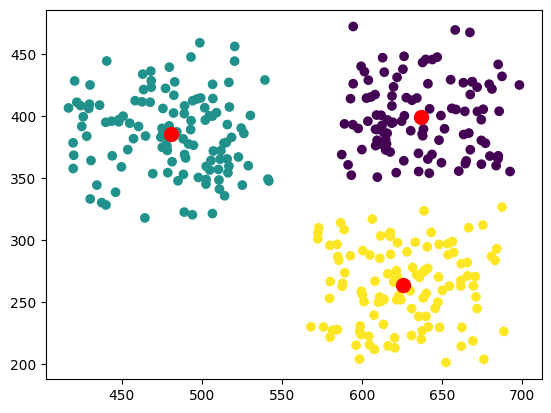

In [ ]:
plt.scatter(data[:,0],data[:,1],c=model.labels)
plt.scatter(model.centroids[:,0],model.centroids[:,1],c='r',s=100)

## Evaluating the Clustering
We analyze how well the clustering performed by checking the final centroid positions and cluster assignments. Further evaluation can be done using metrics like inertia or silhouette score.

Here Silhouette Score is evaluated:

In [ ]:
model.silhouette_score(data,model.labels)

0.6110715619378334

## Choosing the Best Number of Clusters (k)
To determine the optimal number of clusters, we use:
- **Within-Cluster Sum of Squares (WCSS)**: Measures how compact clusters are. We plot WCSS vs. k to identify the 'elbow point.'
- **Silhouette Score**: Measures how well-separated clusters are. Higher silhouette scores indicate better clustering.

In [ ]:
wcss = model.wcss(data)
wcss

array([[3.64832640e+06, 1.00000000e+00],
       [1.63466214e+06, 2.00000000e+00],
       [6.37784623e+05, 3.00000000e+00],
       [5.67471951e+05, 4.00000000e+00],
       [4.64843308e+05, 5.00000000e+00],
       [4.00086210e+05, 6.00000000e+00],
       [3.39468130e+05, 7.00000000e+00],
       [3.18022970e+05, 8.00000000e+00],
       [3.27985502e+05, 9.00000000e+00],
       [2.68932446e+05, 1.00000000e+01]])

## Implementing the Elbow Method
We calculate WCSS for different values of k and plot the results. The 'elbow point' in the graph helps us choose the best k value.

Text(0, 0.5, 'WCSS')

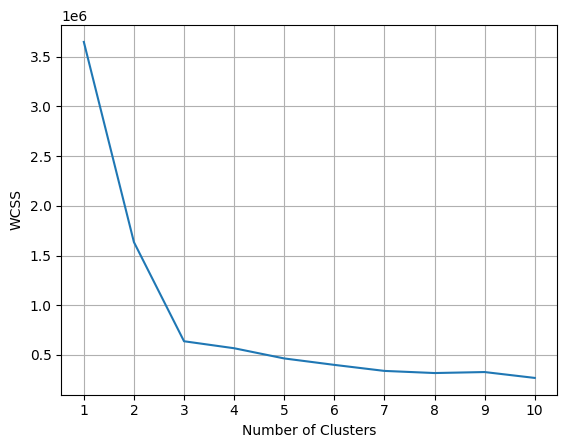

In [ ]:
plt.plot(wcss[:,1],wcss[:,0])
plt.grid(True)
plt.xticks(wcss[:,1])
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

## Implementing the Silhouette Score Analysis
We compute the silhouette score for different values of k. A higher silhouette score indicates better-defined clusters. This helps validate our choice of k.

Text(0, 0.5, 'Silhouette Score')

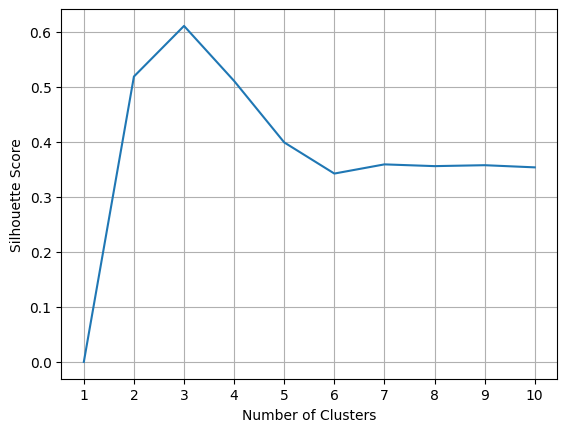

In [ ]:
k = 10
scores = np.zeros(k)
for i in range(1,k+1):
  model_i = k_meansClustering()
  model_i.fit(data,k=i,random_state=1)
  model_i.silhouette_score(data,model_i.labels)
  scores[i-1] = model_i.silhouette_score(data,model_i.labels)

plt.plot(range(1,k+1),scores)
plt.grid(True)
plt.xticks(range(1,k+1))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

## Final Observations and Improvements
### Key Learnings:
- Implemented K-Means Clustering
- Used **WCSS and the elbow method** to select k.
- Validated clustering quality with **silhouette scores**.

### Possible Improvements:
- Implementing **K-Means++ for better centroid initialization**.
- Comparing K-Means with other clustering techniques like **DBSCAN or hierarchical clustering**.
- Testing on real-world datasets for practical applications.

## Conclusion
This notebook successfully implemented K-Means clustering from scratch. Key takeaways:
- **Implemented K-Means without using external libraries like Scikit-Learn**
- **Visualized raw data and clustered data**
- **Understood how centroids update iteratively**
- **Can apply this knowledge to real-world datasets for clustering tasks**

Further improvements could include optimizing centroid initialization and using advanced methods like K-Means++ for better clustering performance.